# **REGRESSION**

Import the necessary pakages

In [ ]:
import sklearn
from sklearn.datasets import make_regression

Generate the regression dataset

In [ ]:
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)              #tuple unpacking
# standardize dataset -- subtract mean, then divide by std dev : (x-mu)/sigma -- how many standard deviations from the mean? is the value
# print(y)

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
print(y.shape, y.ndim, type(y))

y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
print(y.shape, y.ndim, type(y))

                                                                                # split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


In [ ]:
print(y[:3])
print(type(X), X.ndim, X.shape)
y = StandardScaler().fit_transform(y.reshape(len(y),1))

In [ ]:
print(type(y), y.ndim, y.shape)
z = y[:,0]
print(type(z), z.ndim, z.shape)

Build the Model - specify model architecture, loss function, optimizer

- inputLayer with 20 nodes --> 1 hidden layer -- 10 neurons ---> 2 hidden layer --- 10 neurons ---> outputLayer with 1 node

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

deep_model = Sequential()
deep_model.add(Dense(10, input_dim=20, activation = 'relu'))
deep_model.add(Dense(10, activation = 'elu'))
deep_model.add(Dense(1, activation = 'relu'))

opt = SGD(learning_rate=0.01, momentum = 0.9)                                   #batch size can also be changed


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [18]:
deep_model.compile(loss = 'huber', optimizer = opt, metrics = ['mse', 'mae'])
#deep_model.compile(loss = 'mean_squared_error', optimizer = opt)

Fit the model - train the model

In [19]:
history = deep_model.fit(trainX,trainy, validation_data=(testX, testy), epochs=200, verbose =1,batch_size=32)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3935 - mae: 0.7648 - mse: 0.9315 - val_loss: 0.4643 - val_mae: 0.8487 - val_mse: 1.1106
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3915 - mae: 0.7552 - mse: 0.9113 - val_loss: 0.4601 - val_mae: 0.8438 - val_mse: 1.0978
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3789 - mae: 0.7504 - mse: 0.8721 - val_loss: 0.4427 - val_mae: 0.8224 - val_mse: 1.0420
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3620 - mae: 0.7219 - mse: 0.8364 - val_loss: 0.4197 - val_mae: 0.7950 - val_mse: 0.9766
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3265 - mae: 0.6812 - mse: 0.7175 - val_loss: 0.3861 - val_mae: 0.7561 - val_mse: 0.8867
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2696 - mae: 0.6094 - mse: 0.5947 - val_loss: 0.3431 - val_mae: 0.6991 - val_mse: 0.7738
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2701 - mae: 0.5924 - mse: 0.6017 - val_loss:

Evaluate the model

In [20]:
#train_msle, train_mse = deep_model.evaluate(trainX, trainy, verbose=0)
train_mae, train_mse,_ = deep_model.evaluate(trainX, trainy, verbose=0)
test_mae, test_mse,_ = deep_model.evaluate(testX, testy, verbose=0)
print('Train MAE: %.3f, Test MAE: %.3f' % (train_mae, test_mae))
print('Train MSE: %.3f, Test MSE: %.3f' % (train_mse, test_mse))




Train MAE: 0.197, Test MAE: 0.227
Train MSE: 0.450, Test MSE: 0.527


Plot the loss incured during training

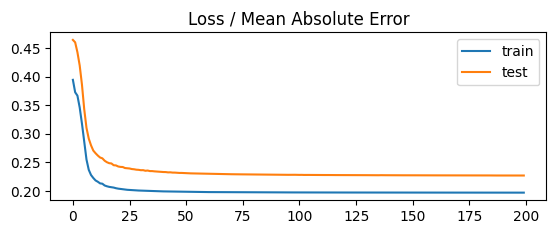

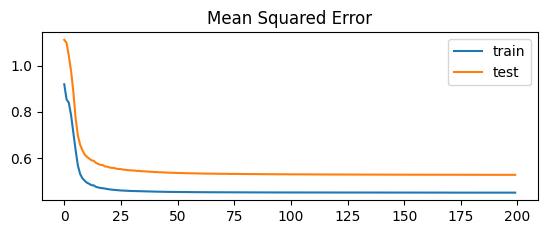

In [21]:
from matplotlib import pyplot

# plot loss during training
#print(test_mse)
pyplot.subplot(211)
pyplot.title('Loss / Mean Absolute Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()